![](https://www.nasa.gov/sites/default/files/thumbnails/image/nasa-logo-web-rgb.png)

# Planetary Mystery

Welcome to your first day as a data intern for NASA! As a fun exercise, all interns will be working to solve... a planetary mystery!

The dataset you will be working on contains weather data for a planet in our solar system, but the identity of that planet is unknown. Your task is to use your data analytics chops to identify the mystery planet!

As usual, you will begin by exploring your dataset.

The dataset, provided by NASA, is called `planet_weather.csv`, and it contains the following information:

- **terrestrial_date**: Date on planet Earth, captured as `yyyy-mm-dd`.

- **sol**: number of elapsed planetary days since beginning measurement.

- **ls**: solar longitude. 0: fall equinox. 90: winter solstice. 180: spring equinox. 270: summer solstice.

- **month**: the month number on the mystery planet.

- **min_temp**: the minimum temperature, in Celsius, during a single day.

- **pressure**: atmospheric pressure, in Pascals.

- **wind_speed**: average wind speed, in meters per second.

- **atmo_opacity**: atmospheric opacity.



# Task 1: Data Inspection

![](https://media.giphy.com/media/pz7LNMYN2dj0hgKaHj/giphy.gif)

In [1]:
# import pandas and plotly express libraries
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# load planet_weather.csv data from datasets folder
nasa = pd.read_csv('datasets/planet_weather.csv')

In [3]:
# preview the data
nasa.head(1)

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny


In [4]:
# How many rows and columns are there in the dataset?
nasa.shape

(1894, 10)

In [5]:
# what are the names of all the columns?
nasa.columns

Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'max_temp',
       'pressure', 'wind_speed', 'atmo_opacity'],
      dtype='object')

In [6]:
# What is the data type of each column?
nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1894 non-null   int64  
 1   terrestrial_date  1894 non-null   object 
 2   sol               1894 non-null   int64  
 3   ls                1894 non-null   int64  
 4   month             1894 non-null   object 
 5   min_temp          1867 non-null   float64
 6   max_temp          1867 non-null   float64
 7   pressure          1867 non-null   float64
 8   wind_speed        0 non-null      float64
 9   atmo_opacity      1894 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 148.1+ KB


In [7]:
# How many null values are there in each column?
nasa.isnull().sum()

id                     0
terrestrial_date       0
sol                    0
ls                     0
month                  0
min_temp              27
max_temp              27
pressure              27
wind_speed          1894
atmo_opacity           0
dtype: int64

In [8]:
# Provide a statistical summary of the DataFrame
nasa.describe()

,id,sol,ls,min_temp,max_temp,pressure,wind_speed
count,1894.000000,1894.000000,1894.000000,1867.000000,1867.000000,1867.000000,0.0
mean,948.372228,1007.930306,169.180570,-76.121050,-12.510445,841.066417,NaN
std,547.088173,567.879561,105.738532,5.504098,10.699454,54.253226,NaN
min,1.000000,1.000000,0.000000,-90.000000,-35.000000,727.000000,NaN
25%,475.250000,532.250000,78.000000,-80.000000,-23.000000,800.000000,NaN
50%,948.500000,1016.500000,160.000000,-76.000000,-11.000000,853.000000,NaN
75%,1421.750000,1501.750000,259.000000,-72.000000,-3.000000,883.000000,NaN
max,1895.000000,1977.000000,359.000000,-62.000000,11.000000,925.000000,NaN


# Task 2: Data Cleaning

![](https://media.giphy.com/media/l49JEBkw8tD64fbeE/giphy-downsized-large.gif)

In [9]:
# Looks like the wind speed sensor on the Rover was broken
# Delete wind_speed column, which is filled with null values
nasa.drop(columns=['wind_speed'], inplace=True)

In [10]:
# How many unique values are there in the atmo_opacity column?
# hint: both .unique() and .value_counts() will work here
nasa['atmo_opacity'].value_counts()

Sunny    1891
--          3
Name: atmo_opacity, dtype: int64

In [11]:
#The atmosphere sensors were faulty and did not capture accurate data
#Delete atmo_opacity column, which mostly contains identical values
nasa.drop(columns=['atmo_opacity'], axis=1, inplace=True)

# Task 3: Data Analysis & Visualization

![](https://media.giphy.com/media/1n8aGJBEXuW0M7ELrB/giphy.gif)



In [12]:
#How many months are there on this planet?
nasa['month'].value_counts()


Month 4     194
Month 3     194
Month 2     182
Month 1     176
Month 12    166
Month 6     153
Month 5     149
Month 11    145
Month 7     142
Month 8     141
Month 9     136
Month 10    116
Name: month, dtype: int64

In [28]:
# What is the average min_temp for each month?
average_min_temp = nasa.groupby('month').agg({'min_temp': ['mean']})
print(average_min_temp)

           min_temp
               mean
month              
Month 1  -77.160920
Month 10 -71.982143
Month 11 -71.985507
Month 12 -74.451807
Month 2  -79.932584
Month 3  -83.307292
Month 4  -82.747423
Month 5  -79.308725
Month 6  -75.299320
Month 7  -72.281690
Month 8  -68.382979
Month 9  -69.171642


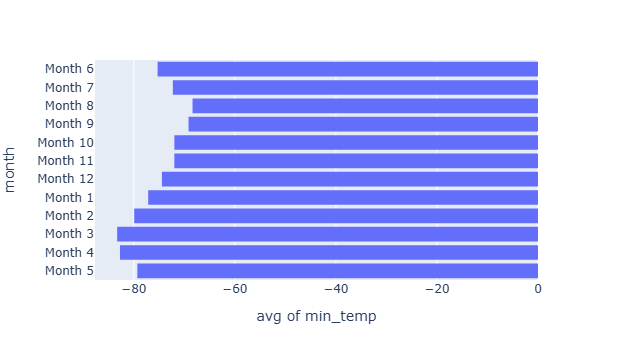

In [ ]:
# Plot a bar chart of the average min_temp by month
px.histogram(nasa, x='month', y='min_temp', histfunc='avg')

Based on the minimum temperature, what is the coldest month? The warmest month?

The coldest month is with month 3 (March) and the warmest month is Month 8 (August).

In [36]:
# What is the average pressure for each month?
atmospheric = nasa.groupby('month').agg({'pressure': ['mean']})
print(atmospheric)

            pressure
                mean
month               
Month 1   862.488506
Month 10  887.312500
Month 11  857.014493
Month 12  842.156627
Month 2   889.455056
Month 3   877.322917
Month 4   806.329897
Month 5   748.557047
Month 6   745.054422
Month 7   795.105634
Month 8   873.829787
Month 9   913.305970


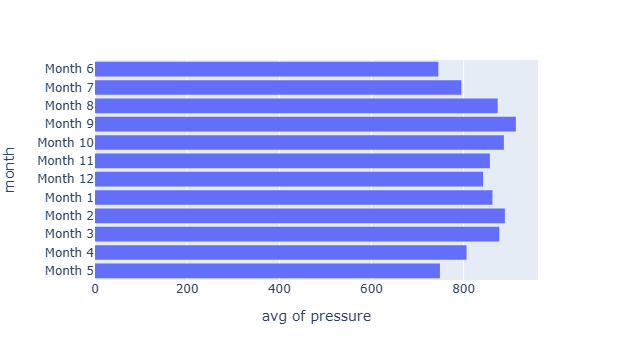

In [37]:
# Create a bar chart of the average atmospheric pressure by month
px.histogram(nasa, x='pressure', y='month', histfunc='avg')

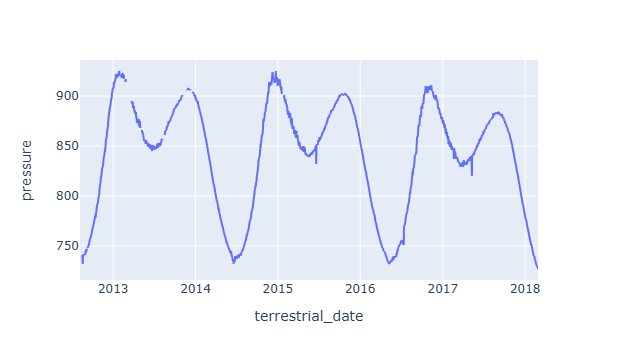

In [38]:
# Plot a line chart of the daily atmospheric pressure by terrestrial date
# note: you do not need to modify the dataframe
# use the original one you loaded at the beginning of the milestone.
px.line(nasa, x='terrestrial_date', y='pressure')

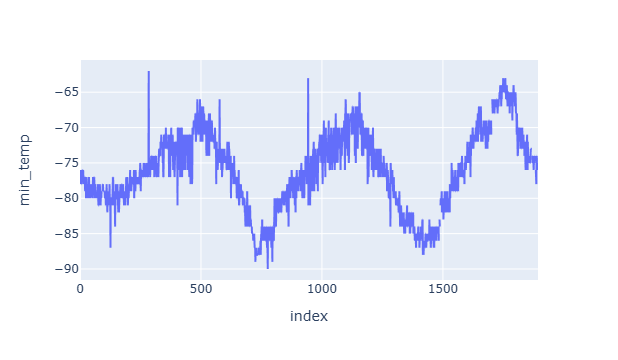

In [43]:
# Plot a line chart the daily minimum temp
# note: you do not need to modify the dataframe
# use the original one you loaded at the beginning of the milestone.
px.line(nasa, y='min_temp')

### Based on this information, approximately how many earth days are there in a year on this planet?

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Note**: To get an approximate range for how long a "year" is on this planet, look at the plots of the atmospheric pressure and the temperatures by day. Use the visualizations to get a *rough estimate* between matching "peaks".</span>

A total year is around 496-500 days.


### What is the identity of the planet?

Go to [this website](https://spaceplace.nasa.gov/years-on-other-planets/en/) and see what planet this lines up with!

It looks like this planet's data is from Mars! And the correct amount of days in it's cycle around the sun is 687 days.

## My first extra-terrestrial discovery!

![](https://media.giphy.com/media/5ndfKr0Nv92LkWrKpU/giphy.gif)